# Community detection - a good use of a network graph

In [3]:
import community
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## python-louvain package 
https://python-louvain.readthedocs.io/en/latest/

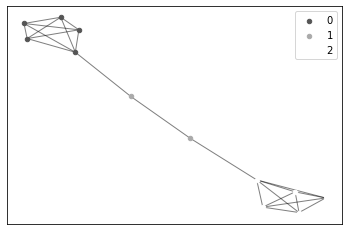

modularity >  0.4886578449905482


In [9]:
#better with karate_graph() as defined in networkx example.
#erdos renyi don't have true community structure

G = nx.erdos_renyi_graph(50, 0.05, seed=1)
G = nx.karate_club_graph()
G = nx.barbell_graph(5, 2)

#first compute the best partition
partition = community.best_partition(G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.



for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size),
                          label= com)


nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.legend(loc=1)
plt.set_cmap('rainbow')
plt.show()


print ("modularity > ", community.modularity(partition, G))

In [10]:
partition

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 1, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2}

In [11]:
clusters = set(partition.values())
values = partition.values()
for cc in clusters:
    print (cc, np.flatnonzero(np.array(list(values))== cc))

0 [0 1 2 3 4]
1 [5 6]
2 [ 7  8  9 10 11]


## community detection with networkx package

In [12]:
import networkx as nx
from networkx.algorithms import community as nxcommunity

communities_generator = nxcommunity.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[[0, 1, 2, 3, 4], [5], [6, 7, 8, 9, 10, 11]]